In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from IPython.display import display, HTML, display_html
import seaborn as sns
import datetime

I obtained the data on daily spot price of crude oil between 1986-01-01 to 2018-11-05 from the Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma https://fred.stlouisfed.org/series/DCOILWTICO . The data from 2018-11-06-2018-11-13 were obtained from bloomberg oil price data https://www.bnnbloomberg.ca/oil. The units of the price is Dollars per Barrel. The price was not seasonally Adjusted. Let's look at this data first. 

In [251]:
# read in WTI data on crude oil price
oilwti = pd.read_csv('DCOILWTICO.csv')
oilwti.head()
oilwti.tail()

,DATE,DCOILWTICO
8569,2018-11-07,61.67
8570,2018-11-08,60.67
8571,2018-11-09,60.19
8572,2018-11-12,59.93
8573,2018-11-13,57.17


In [252]:
#check data types 
oilwti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8574 entries, 0 to 8573
Data columns (total 2 columns):
DATE          8574 non-null object
DCOILWTICO    8574 non-null object
dtypes: object(2)
memory usage: 134.0+ KB


In [253]:
# rename the variables
oilwti = oilwti.rename(columns = {'DATE': 'date', 'DCOILWTICO': 'price'})

When trying to transform the data type of price from object to numeric, I got warning that character "." cannot be changed to float. So let's replace all the "." by NA first and change the price to numeric type.  

In [254]:
oilwti.replace(to_replace='.', value=np.nan, inplace=True)
oilwti['price'] = oilwti['price'].astype(np.float64)

In [255]:
# count the total missing data 
oilwti.isnull().sum()

date       0
price    284
dtype: int64

In [239]:
# print all the missing data
oilwti[oilwti["price"].isna()]

,date,price
32,86-02-17,NaN
61,86-03-28,NaN
102,86-05-26,NaN
131,86-07-04,NaN
172,86-09-01,NaN
202,86-10-13,NaN
235,86-11-27,NaN
255,86-12-25,NaN
256,86-12-26,NaN
260,87-01-01,NaN


There are in all 284 missing data in price. By looking at the date of these missing data, they all correspond to holidays in the US, which means the missingness are due to market close. To keep the data having a complete weekday observation pattern, I use the last observation carry forward to fill out the missing data. 

In [256]:
oilwti = oilwti.fillna(method="ffill")
oilwti.isnull().sum()
oilwti.head()
oilwti.tail()

,date,price
8569,2018-11-07,61.67
8570,2018-11-08,60.67
8571,2018-11-09,60.19
8572,2018-11-12,59.93
8573,2018-11-13,57.17


In [257]:
# change the index to date
oilwti['date'] = pd.to_datetime(oilwti['date'])
oilwti.set_index('date', inplace=True)

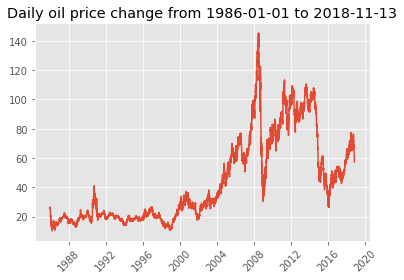

In [269]:
# Plot time series data
f, ax = plt.subplots(1,1)
ax.plot(oilwti['price'])

# Add title
ax.set_title('Daily oil price change from 1986-01-01 to 2018-11-13')

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 45)

# Show graph
plt.show()
plt.close()

In [259]:
oilwti[oilwti["price"] == max(oilwti.price)]

,price
date,
2008-07-03,145.31
2008-07-04,145.31


According to the plot, the crude oil price was relatively stable between 1986 and 1998, but started to gradually rise from 1999 and reached to its peak in July 2008. As explained by this wiki page (https://en.wikipedia.org/wiki/2000s_energy_crisis), these price increases can be attributed to many factors, including Middle East tension, soaring demand from China, the falling value of the U.S. dollar, reports showing a decline in petroleum reserves, worries over peak oil, and financial speculation. Since then, the oil price has been very volatile. 

This plot suggests that the short-term oil price can be strongly affected by certain recent geopolitical events, but may not be much affected by the long-term historical oil price. Other factors such as the oil demand and supply, market speculation also play an important role. Taking these factors into consideration may give us a better prediction of the short-term oil price. 

I will start with exploring the association between the current oil price and its historical price first, then try to incorporate other features that may have important impact on short term oil price. 

Since the goal is to predict the short-term daily oil price. I will only focus on the data starting from 2016 when the oil price hitted another local minimum and seemingly started a new cycle.  

In [260]:
shortdat = oilwti.loc["2016-01-01":].copy()
shortdat.head()

,price
date,
2016-01-01,37.13
2016-01-04,36.81
2016-01-05,35.97
2016-01-06,33.97
2016-01-07,33.29


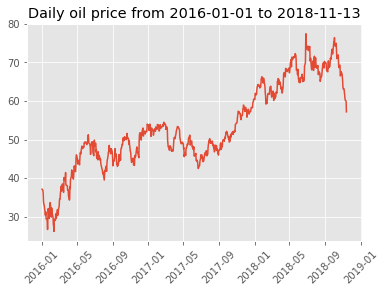

In [267]:
f, ax = plt.subplots(1,1)
ax.plot(shortdat['price'])

# Add title
ax.set_title('Daily oil price from 2016-01-01 to 2018-11-13')

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 45)

# Show graph
plt.show()
plt.close()

There is an obvious overall increasing trend but no obvious seasonal trend in the oil price in the past three years. Next I take a look at the autocorrelation structure and the partial autocorrelation structure of this time series. 

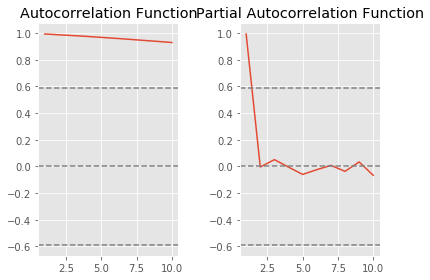

In [262]:
# calculate the autocorrelation structure and partial autocorrelation structure of this time series
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
acf_org = acf(shortdat.price, nlags=10)
pacf_org = pacf(shortdat.price, nlags=10, method='ols')

#Plot ACF:  
plt.subplot(121)
plt.plot(range(1, len(acf_org)), acf_org[1:])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(acf_org)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(acf_org)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(range(1, len(pacf_org)), pacf_org[1:])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(pacf_org)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(pacf_org)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

The autocorrelation function (ACF) plot shows a very slow, linear decay pattern which is typical of a nonstationary time series. The PACF plot has a significant spike only at lag 1, meaning that all the higher-order autocorrelations are effectively explained by the lag-1 autocorrelation. Based on these two plots, lag1 differencing may be a good approach to stationarize this time series. So next I calculate the lag 1 difference of the series. 

In [263]:
shortdat["lag1"] = shortdat.price.diff()
shortdat.lag1[0] = 0
shortdat.head()

,price,lag1
date,,
2016-01-01,37.13,0.00
2016-01-04,36.81,-0.32
2016-01-05,35.97,-0.84
2016-01-06,33.97,-2.00
2016-01-07,33.29,-0.68


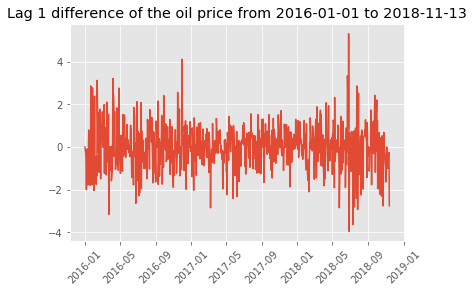

In [268]:
_, ax = plt.subplots(1,1)
ax.plot(shortdat['lag1'])
# Add title
ax.set_title('Lag 1 difference of the oil price from 2016-01-01 to 2018-11-13')
# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 45)
# Show graph
plt.show()
plt.close()

The lag 1 series appears to be approximately stationary with no long-term trend. Now take a look at the ACF and PACF of this series:

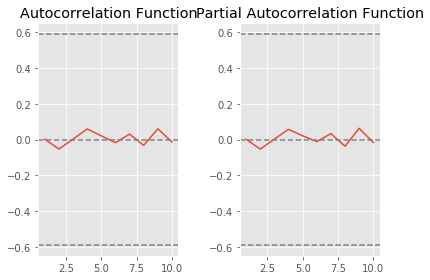

In [265]:
acf_lag1 = acf(shortdat.lag1, nlags=10)
pacf_lag1 = pacf(shortdat.lag1, nlags=10, method='ols')

#Plot ACF:  
plt.subplot(121)
plt.plot(range(1, len(acf_lag1)), acf_lag1[1:])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(acf_lag1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(acf_lag1)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(range(1, len(pacf_lag1)), pacf_lag1[1:])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(pacf_lag1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(pacf_lag1)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

The ACF and PACF plots suggest that the lag-1 difference of oil price at different times are almost independent. The oil price changes in a fashion same as random walk. Based on these observations, I fit a random walk model to the original time series data to obtain the long-term drift of the oil price (overall trend in the oil price change). 

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  747
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1096.076
Method:                           css   S.D. of innovations              1.050
Date:                Tue, 13 Nov 2018   AIC                           2196.152
Time:                        12:17:39   BIC                           2205.384
Sample:                    01-04-2016   HQIC                          2199.710
                         - 11-13-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0268      0.038      0.699      0.485      -0.048       0.102


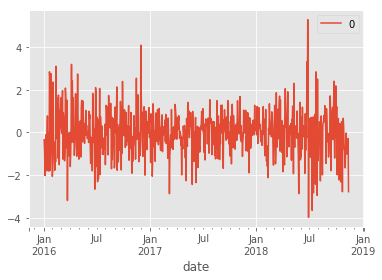

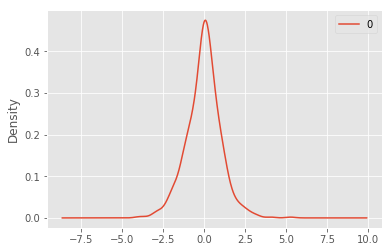

                  0
count  7.470000e+02
mean  -6.182768e-17
std    1.050257e+00
min   -3.986827e+00
25%   -6.018273e-01
50%    1.317269e-02
75%    5.931727e-01
max    5.293173e+00


In [270]:
from statsmodels.tsa.arima_model import ARIMA
mod = ARIMA(shortdat.price, order=(0,1,0))
mod_fit = mod.fit(disp=0)
print(mod_fit.summary())
# plot residual errors
residuals = pd.DataFrame(mod_fit.resid)
residuals.plot()
plt.show()
# plot the distribution of the residual errors
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

The results suggest that there is a weak trend of 2.7 cents increase in the daily oil price in the past 3 years. Next we obtain the mean squared error (MSE) of this model through cross validation. 

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 1.290


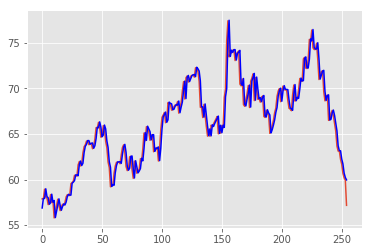

In [271]:
from sklearn.metrics import mean_squared_error
X = shortdat.price.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
  #  print('predicted=%f, true=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='blue')
plt.show()


**Based on this model, let's predict the price in the next 3 days, the results below suggest that the predicted oil price on Friday based on this model is $57.25. **

In [272]:
predict = mod_fit.forecast(steps=3)[0]
print(predict)

[57.19682731 57.22365462 57.25048193]


This random walk model obviously is not an ideal model for oil price prediction, because it only takes into account the historical oil price. As I discussed earlier, the short-term oil price may not so much depend on its historical price but may be strongly affected by many other factors such as supply and demand, financial market, commodities market, speculative, and geopolitical. So next, I try to incorporate these factors into the model. 

I collected the following data as proxies for these various factors: 


**CBOE Crude Oil ETF Volatility Index**: a measure of the market's expectation of 30-day volatility of crude oil prices.

**MSCI ACWI Index**: The MSCI ACWI captures large and mid cap representation across 23 Developed Markets (DM) and 24 Emerging Markets (EM) countries*. With 2,791 constituents, the index covers approximately 85% of the global investable equity opportunity set.

**Effective Federal Funds Rate**: the central interest rate in the U.S. financial market. It influences other interest rates such as the prime rate, which is the rate banks charge their customers with higher credit ratings. Additionally, the federal funds rate indirectly influences longer- term interest rates such as mortgages, loans, and savings, all of which are very important to consumer wealth and confidence.

**3-Month Treasury Bill Rate**: a measure represent immediate sentiments in consumer-saving behavior.

**S\&P 500 Index**: is a market-capitalization-weighted index of the 500 largest U.S. publicly traded companies by market value, The index is widely regarded as the best single gauge of large-cap U.S. equities.


**Gold Fixing Price**: 3:00 P.M. (London time) in London Bullion Market, based in U.S. Dollars.

These data were all downloaded from https://fred.stlouisfed.org. 

**market sentiment based on twitter data**: On top of these data, to get the sentiment of the market about oil price, I resort to Twitter. To get historical tweets, I use a Python tool called GetOldTweets which I found from the following github repo: https://github.com/Jefferson-Henrique/GetOldTweets-python. I download the tweet results based on the query search “oil price opec”, which I think will be more relevant to our context. The date range is from 2015-12-15 to 2018-11-13. Due to the time limit and weak internet connection, I limit the return of the query to 200-300 each day. This gives me the result table_big_new.csv, which includes 244700 rows. The code to get data is in get_twitter_data.py.

Unfortunately, for some reason, a lot of extracted tweets are repeated. So I have to clean the data and eliminate the duplicated results. This leads to 16677 rows remained in the dataset. I then eliminated the url address in the end of text and use NLTK package to get the sentiment score of each tweet texts. The result is stored in tweet_nodup_sentiment_new.csv.

Finally I group tweets of the same day together and aggregate the sentiment score, so I have one market sentiment score for each day in the range of dates I consider. This is sentiment_byday_big_new.csv. The code of the above mentioned data processing steps can be found in process_tweet_data.py. 


Because previous analysis suggests that the daily oil price changes are almost indenpendently and normally distributed. I will build a linear regreesion to predict the daily price change based on all the factors described above. Since the goal is to predict the oil price on Friday, and I have access to most data only up to today (Tuesday) or last Friday. I will adjust the lagged information to predict the current price change.  

In [273]:
#Read all the above data now
gold = pd.read_csv('GOLDPMGBD228NLBM.csv')
dff = pd.read_csv('DFF.csv')
acwi = pd.read_csv('acwi.csv')
sp500 = pd.read_csv('SP500.csv')
dtb = pd.read_csv('DTB3.csv')
ovx = pd.read_csv('OVXCLS.csv')
twit = pd.read_csv("sentiment_byday_big_new.csv", names = ['date', 'sentiment'])

In [310]:
gold = gold.rename(columns = {'DATE': 'date', 'GOLDPMGBD228NLBM': 'price'})
gold.replace(to_replace='.', value=np.nan, inplace=True)
gold = gold.fillna(method="ffill")
gold.price = gold.price.astype(np.float64)
gold['date'] = pd.to_datetime(gold['date'])
gold.set_index('date', inplace=True)

In [329]:
dff = dff.rename(columns = {'DATE': 'date', 'DFF': 'fundsrate'})
dff.info()
dff.isnull().sum()
dff['date'] = pd.to_datetime(dff['date'])
dff.set_index('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23507 entries, 1954-07-01 to 2018-11-08
Data columns (total 1 columns):
fundsrate    23507 non-null float64
dtypes: float64(1)
memory usage: 367.3 KB


In [334]:
acwi.info()
acwi.columns = ['date', 'acwistd']
acwi.isnull().sum()
acwi['date'] = pd.to_datetime(acwi['date'])
acwi.set_index('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 2 columns):
Date                              1046 non-null object
ACWI Standard (Large+Mid Cap)     1046 non-null float64
dtypes: float64(1), object(1)
memory usage: 16.4+ KB


In [348]:
sp500.info()
sp500.columns = ['date', 'sp500idx']
sp500.replace(to_replace='.', value=np.nan, inplace=True)
sp500 = sp500.fillna(method="ffill")
sp500.sp500idx = sp500.sp500idx.astype(np.float64)
sp500['date'] = pd.to_datetime(sp500['date'])
sp500.set_index('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 2 columns):
date        2609 non-null object
sp500idx    2609 non-null object
dtypes: object(2)
memory usage: 40.8+ KB


In [352]:
dtb.info()
dtb.columns = ['date', 'dtb3']
dtb.replace(to_replace='.', value=np.nan, inplace=True)
dtb = dtb.fillna(method="ffill")
dtb.dtb3 = dtb.dtb3.astype(np.float64)
dtb['date'] = pd.to_datetime(dtb['date'])
dtb.set_index('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16919 entries, 0 to 16918
Data columns (total 2 columns):
DATE    16919 non-null object
DTB3    16919 non-null object
dtypes: object(2)
memory usage: 264.4+ KB


In [355]:
ovx.info()
ovx.columns = ['date', 'ovxcls']
ovx.replace(to_replace='.', value=np.nan, inplace=True)
ovx = ovx.fillna(method="ffill")
ovx.ovxcls = ovx.ovxcls.astype(np.float64)
ovx['date'] = pd.to_datetime(ovx['date'])
ovx.set_index('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
DATE      1305 non-null object
OVXCLS    1305 non-null object
dtypes: object(2)
memory usage: 20.5+ KB


In [327]:
twit['date'] = pd.to_datetime(twit['date'])
twit.set_index('date', inplace=True)

In [357]:
twit.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1065 entries, 2015-12-15 to 2018-11-13
Data columns (total 1 columns):
sentiment    1065 non-null float64
dtypes: float64(1)
memory usage: 16.6 KB


In [380]:
data_frames = [twit, ovx, dtb, sp500, acwi, dff, gold]
df = twit.copy()
for i in range(1, len(data_frames)):
    df = df.merge(right=data_frames[i], on='date', how='left')

In [407]:
df.tail(10)

,sentiment,ovxcls,dtb3,sp500idx,acwistd,fundsrate,price
date,,,,,,,
2018-10-30,-0.399960,29.90,2.29,2682.63,478.191,2.20,1225.40
2018-10-31,-0.011218,30.12,2.29,2711.74,484.571,2.20,1214.95
2018-11-01,-0.003350,31.54,2.27,2740.37,489.476,2.20,1231.15
2018-11-02,-0.050221,32.21,2.28,2723.06,489.974,2.19,1232.10
2018-11-05,-0.127380,32.68,2.32,2738.31,490.583,2.20,1232.25
2018-11-06,-0.088638,34.15,2.31,2755.45,492.704,2.20,1231.60
2018-11-07,-0.211605,33.05,2.32,2813.89,500.232,2.20,1229.95
2018-11-08,-0.026405,32.23,2.30,2806.83,499.566,2.20,1224.15
2018-11-09,-0.293230,35.10,2.30,2781.01,494.482,2.20,1211.40


In [387]:
df.loc['2018-11-09', 'dtb3'] = df.loc['2018-11-08', 'dtb3']
df.loc['2018-11-12', 'dtb3'] = df.loc['2018-11-08', 'dtb3']
df.loc['2018-11-09', 'fundsrate'] = df.loc['2018-11-08', 'fundsrate']
df.loc['2018-11-12', 'fundsrate'] = df.loc['2018-11-08', 'fundsrate']
df.dropna(inplace=True)

In [408]:
df.tail(10)

,sentiment,ovxcls,dtb3,sp500idx,acwistd,fundsrate,price
date,,,,,,,
2018-10-30,-0.399960,29.90,2.29,2682.63,478.191,2.20,1225.40
2018-10-31,-0.011218,30.12,2.29,2711.74,484.571,2.20,1214.95
2018-11-01,-0.003350,31.54,2.27,2740.37,489.476,2.20,1231.15
2018-11-02,-0.050221,32.21,2.28,2723.06,489.974,2.19,1232.10
2018-11-05,-0.127380,32.68,2.32,2738.31,490.583,2.20,1232.25
2018-11-06,-0.088638,34.15,2.31,2755.45,492.704,2.20,1231.60
2018-11-07,-0.211605,33.05,2.32,2813.89,500.232,2.20,1229.95
2018-11-08,-0.026405,32.23,2.30,2806.83,499.566,2.20,1224.15
2018-11-09,-0.293230,35.10,2.30,2781.01,494.482,2.20,1211.40


In [393]:
df = df['2015-12-29':]

In [398]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df[:'2018-11-07'].values, shortdat['lag1'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [401]:
# Make predictions using the testing set
y_pred = regr.predict(df["2018-11-08":])
y_pred

array([-0.08301351, -0.08702059, -0.04136383])

In [409]:
shortdat["price"][-1]

57.17

Based on today's oil price 57.17, the estimated oil price in the following 3 days are:

In [404]:
np.cumsum(y_pred)+shortdat["price"][-1]

array([57.08698649, 56.99996591, 56.95860208])

**Based on this model, the estimated oil price on Friday is \$56.96.**
**Recall that the estimated price on Friday is \$57.25 based on the 1st random walk model. **

Due to time limitation, I did not cross validate the above linear model. The features adjusted in the model also need to be further examined to see if there is any non-linear assocations. 